<a href="https://colab.research.google.com/github/Ryanywan/NH_Upload/blob/main/Naver_OCR_Manual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NCP OCR (Textract) Example
## NCP Cloud 연결 및 Pipeline에 필요한 library를 호출합니다.

In [ ]:
import requests
import uuid
import time
import urllib.request
import json

## 기존 NCP로 작업을 해둔 link와 secret key를 입력하고 필요한 서비스를 호출합니다.

In [ ]:
api_url = 'https://00ec4bbd061c4f56a126dce23dd82f0b.apigw.ntruss.com/custom/v1/9514/66553d4d7b1f558c9344bec74f1a7539e4ccc343ec5a2d0e3d84f2c4f5f4927f/infer'

secret_key = #API Key
image_file = '외국인등록증샘플.jpg'

output_file = 'output2.json'

request_json = {
    'images': [
        {
            'format': 'jpg',
            'name': 'demo'
        }
    ],
    'requestId': str(uuid.uuid4()),
    'version': 'V2',
    'timestamp': int(round(time.time() * 1000))
}

payload = {'message': json.dumps(request_json).encode('UTF-8')}
files = [
  ('file', open(image_file,'rb'))
]
headers = {
  'X-OCR-SECRET': secret_key
}

response = requests.request("POST", api_url, headers=headers, data = payload, files = files)

with open(output_file, 'w', encoding='utf-8') as outfile:
    json.dump(res, outfile, indent=4, ensure_ascii=False)

### Example 1

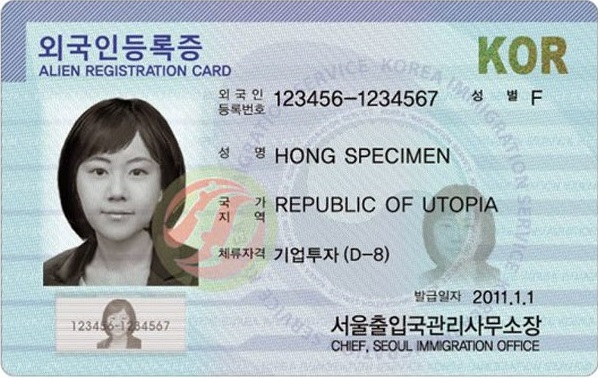

In [ ]:
res = json.loads(response.text.encode('utf8'))
res

{'version': 'V2',
 'requestId': '84c189c7-deb8-4cae-8148-c8e14a5ddccb',
 'timestamp': 1632731520245,
 'images': [{'uid': '95e591bb86a24c91bf6d73940c20ce7c',
   'name': 'demo',
   'inferResult': 'SUCCESS',
   'message': 'SUCCESS',
   'matchedTemplate': {'id': 9186, 'name': 'text1'},
   'validationResult': {'result': 'NO_REQUESTED'},
   'title': {'name': '외국인등록증',
    'boundingPoly': {'vertices': [{'x': 34.0, 'y': 29.0},
      {'x': 234.0, 'y': 29.0},
      {'x': 234.0, 'y': 77.0},
      {'x': 34.0, 'y': 77.0}]},
    'inferText': '외국인등록증\nALIEN REGISTRATION CARD',
    'inferConfidence': 0.9959,
    'subFields': [{'boundingPoly': {'vertices': [{'x': 34.0, 'y': 29.0},
        {'x': 206.0, 'y': 29.0},
        {'x': 206.0, 'y': 65.0},
        {'x': 34.0, 'y': 65.0}]},
      'inferText': '외국인등록증',
      'inferConfidence': 0.9999,
      'lineBreak': False},
     {'boundingPoly': {'vertices': [{'x': 36.0, 'y': 63.0},
        {'x': 81.0, 'y': 63.0},
        {'x': 81.0, 'y': 76.0},
        {'x': 